# 1.导入相关的依赖包

In [1]:
import numpy as np
import QubitSim2.model
import QubitSim2.constant as ct
from matplotlib import pyplot as plt

# 2.创建量子线路

In [2]:
# 创建一个量子线路
circuit = QubitSim2.model.Circuit()

# 创建比特1
C = 88.1E-15+1E-20
phi_r = 0.0*np.pi
I_c_1 = 2.8E-4/18000
I_c_2 = 2.8E-4/18000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

# 创建比特2
C = 88.1E-15+1E-20
phi_r = 0.12*np.pi
I_c_1 = 2.8E-4/18000
I_c_2 = 2.8E-4/18000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

# 创建coupler
C = 125.4E-15+1E-20
phi_r = 0.39*np.pi
I_c_1 = 2.8E-4/3000
I_c_2 = 2.8E-4/2000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

# 创建连接
C = 6E-16+1E-20
L = 1
circuit.add_connect(0, 1, C, L)
C = 10.11E-15+1E-20
L = 1
circuit.add_connect(1, 2, C, L)
C = 10.11E-15+1E-20
L = 1
circuit.add_connect(0, 2, C, L)

# 设置仿真参数
t_start = 0
t_end = 20E-9
t_piece = 1E-11
operator_order_num = 4
trigonometric_function_expand_order_num = 8
exponent_function_expand_order_num = 15
circuit.set_simulation_parameter(t_start, t_end, t_piece, operator_order_num,trigonometric_function_expand_order_num, exponent_function_expand_order_num)

# 设置子空间
circuit.subspace = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]]

# 设置信号函数
def signal_fun(t):
    Amplitude = 0.00365
    f01_Q1 = 4.7035E9
    phi = np.pi-0.3356
    Envolope=1-np.cos(2*np.pi*(t)/(20E-9))
    return  Amplitude*Envolope*np.cos(2*np.pi*f01_Q1*t+phi)

# 将信号加入量子线路
qubit_index = 0
circuit.add_signal(qubit_index,'x',signal_fun)

# 3运行量子线路

In [3]:
circuit.run()

Calculating the whole time evolution operator:


100% |########################################################################|


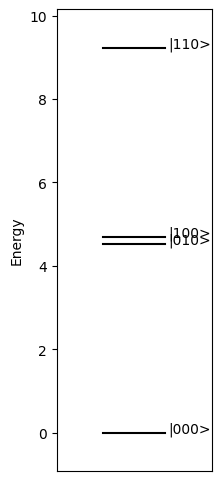

In [5]:
circuit.energy_levels_show_process(circuit.Hamiltonian_generator(0,'z'),circuit.subspace)

In [6]:
X2PQ1_idleQ2_matrix = circuit.time_evolution_operator_dressed_sub
print("X2PQ1_idleQ2_matrix:")
for i in range(4):
    for j in range(4):
        print("%.4f" % np.abs(X2PQ1_idleQ2_matrix[i][j]), end='_')
        print("%.4f" % np.angle(X2PQ1_idleQ2_matrix[i][j]), end=',')
    print()

X2PQ1_matrix = np.zeros([2, 2], dtype=complex)
X2PQ1_matrix[0][0] = X2PQ1_idleQ2_matrix[0][0]
X2PQ1_matrix[0][1] = X2PQ1_idleQ2_matrix[0][2]
X2PQ1_matrix[1][0] = X2PQ1_idleQ2_matrix[2][0]
X2PQ1_matrix[1][1] = X2PQ1_idleQ2_matrix[2][2]
print("\nX2PQ1_matrix:")
print(X2PQ1_matrix)

theta_g = (np.angle(X2PQ1_matrix[0][0])+np.angle(X2PQ1_matrix[1][1]))/2.0
phi = 2*np.arccos(np.real(X2PQ1_matrix[0][0]/np.exp(complex(0, 1)*theta_g)))
nx = np.imag(X2PQ1_matrix[0][1] /
             np.exp(complex(0, 1)*theta_g))/(-1)/np.sin(phi/2)
ny = np.real(X2PQ1_matrix[0][1] /
             np.exp(complex(0, 1)*theta_g))/(-1)/np.sin(phi/2)
nz = np.imag(X2PQ1_matrix[0][0] /
             np.exp(complex(0, 1)*theta_g))/(-1)/np.sin(phi/2)
print("theta_g=%.4f" % theta_g)
print("phi=%.4f" % phi)
print("nx=%.4f" % nx)
print("ny=%.4f" % ny)
print("nz=%.4f" % nz)

X2PQ1_idleQ2_matrix:
0.7092_0.0112,0.0000_-0.3283,0.7050_-1.6178,0.0001_-1.4051,
0.0000_2.9472,0.7093_0.0109,0.0002_2.2754,0.7046_-1.6146,
0.7050_-1.6233,0.0002_-1.0045,0.7092_-0.1108,0.0003_-0.4553,
0.0001_1.8577,0.7046_-1.6264,0.0003_2.8118,0.7095_-0.1101,

X2PQ1_matrix:
[[ 0.70911712+0.00797464j -0.03312835-0.70424903j]
 [-0.0370288 -0.70405472j  0.70482694-0.07842046j]]
theta_g=-0.0498
phi=1.5687
nx=0.9981
ny=-0.0028
nz=-0.0612
